<a href="https://colab.research.google.com/github/OswaldVc/BDD/blob/main/TP/Accidentes_en_la_ciudad_de_Nueva_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Accidentes en la ciudad de Nueva York***

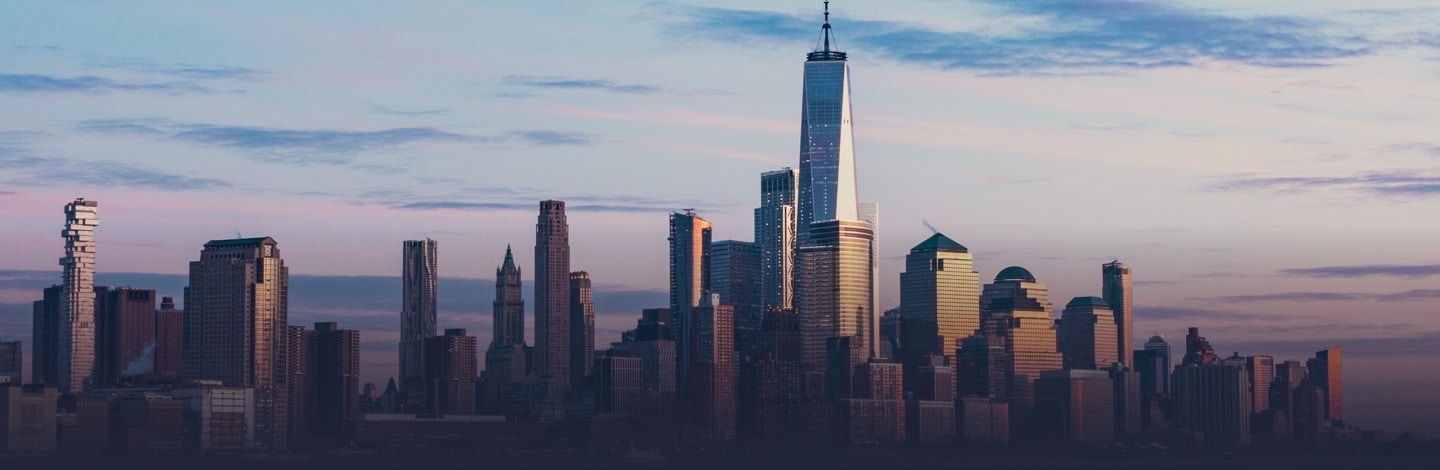

# ***Librerias***

In [ ]:
########Importamos las librerías y módulos necesario del proyecto.##############
################################################################################
import matplotlib.pyplot as plt
from datetime import datetime
from locale import normalize
from datetime import date
import missingno as msno
import plotly.express    as px
import warnings
import numpy  as np
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
import folium
from folium.plugins import HeatMap

# Tratamiento de datos
# ==============================================================================
import pandas as pd
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

from IPython.core.display import display, HTML, Javascript
from matplotlib.gridspec import GridSpec
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
from sklearn.linear_model import LinearRegression                     
## Parte estadística.
import statsmodels.formula.api  as smf                               
from scipy.stats import shapiro, probplot                              
from statsmodels.stats.anova import anova_lm   
import warnings
warnings.filterwarnings('ignore')


sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.style.use("ggplot")

url_base ="https://raw.githubusercontent.com/OswaldVc/BDD/main/NYC_Motor_Vehicle_Collisions_to_Person.csv"
df = pd.read_csv(url_base)

# ***Lectura de datos***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRASH_DATE             45669 non-null  object 
 1   CRASH_TIME             45669 non-null  object 
 2   PERSON_INJURY          45669 non-null  object 
 3   PERSON_AGE             45248 non-null  float64
 4   BODILY_INJURY          45669 non-null  object 
 5   SAFETY_EQUIPMENT       39434 non-null  object 
 6   PERSON_SEX             45669 non-null  object 
 7   PERSON_TYPE            45669 non-null  object 
 8   PED_LOCATION           6571 non-null   object 
 9   CONTRIBUTING_FACTOR_2  6546 non-null   object 
 10  EJECTION               39429 non-null  object 
 11  COMPLAINT              45669 non-null  object 
 12  EMOTIONAL_STATUS       45669 non-null  object 
 13  VEHICLE_ID             39098 non-null  float64
 14  PERSON_ID              45669 non-null  object 
 15  CO

In [ ]:
df.isna().mean()

CRASH_DATE               0.000000
CRASH_TIME               0.000000
PERSON_INJURY            0.000000
PERSON_AGE               0.009219
BODILY_INJURY            0.000000
SAFETY_EQUIPMENT         0.136526
PERSON_SEX               0.000000
PERSON_TYPE              0.000000
PED_LOCATION             0.856117
CONTRIBUTING_FACTOR_2    0.856664
EJECTION                 0.136635
COMPLAINT                0.000000
EMOTIONAL_STATUS         0.000000
VEHICLE_ID               0.143883
PERSON_ID                0.000000
CONTRIBUTING_FACTOR_1    0.856401
POSITION_IN_VEHICLE      0.136219
PED_ROLE                 0.000000
UNIQUE_ID                0.000000
PED_ACTION               0.856117
COLLISION_ID             0.000000
dtype: float64

In [ ]:
df=df[~(df.PERSON_AGE<1) & (df.PERSON_AGE<90)]

In [ ]:
df['CRASH_DATE']=pd.to_datetime(df.CRASH_DATE)
df['CRASH_TIME']=pd.to_datetime(df.CRASH_TIME)
df['CRASH_TIME']=df['CRASH_TIME'].dt.hour
df['CRASH_MONTH_NUM']=df.CRASH_DATE.dt.month

df['CRASH_MONTH']=df.CRASH_DATE.dt.month_name()
df['CRASH_Day_Name']=df.CRASH_DATE.dt.day_name()
df['CRASH_WEEK']=df.CRASH_DATE.dt.day_of_week
df['CRASH_WEEK']=df.CRASH_WEEK.apply(lambda x:x+1)
df['Week_D_E']=df.CRASH_Day_Name.apply(lambda x: 'Weekend' if (x=='Saturday' or x=='Sunday') else 'Weekday' )

In [ ]:
Count=df['CRASH_TIME'].value_counts().reset_index()
Count.sort_values(by='index',inplace=True)
Count['Colors']=Count.CRASH_TIME.apply(lambda x: '#DE5479' if x>2800 else ('#ffcccb' if (x<2800 and x>Count.CRASH_TIME.mean()) else 'lightblue'))

MonthCount=df.CRASH_MONTH.value_counts().reset_index()
MonthCount['Month_Color']=MonthCount.CRASH_MONTH.apply(lambda x : '#DE5479' if x>5000 else ('#ffcccb' if x<5000 and x>4100 else 'lightblue'))

Month_Color=['lightblue','lightblue','lightblue','lightblue','#DE5479','#DE5479','#ffcccb','#ffcccb','#ffcccb','#ffcccb','lightblue']
Months=['January','February','March','April','May','June','July','August','September','October','November']

PersonRoleCount=df.PERSON_TYPE.value_counts().reset_index()
PersonRoleCount['PED_ROLE_per']=PersonRoleCount.PERSON_TYPE.apply(lambda x: round(x/PersonRoleCount.PERSON_TYPE.sum(),3))

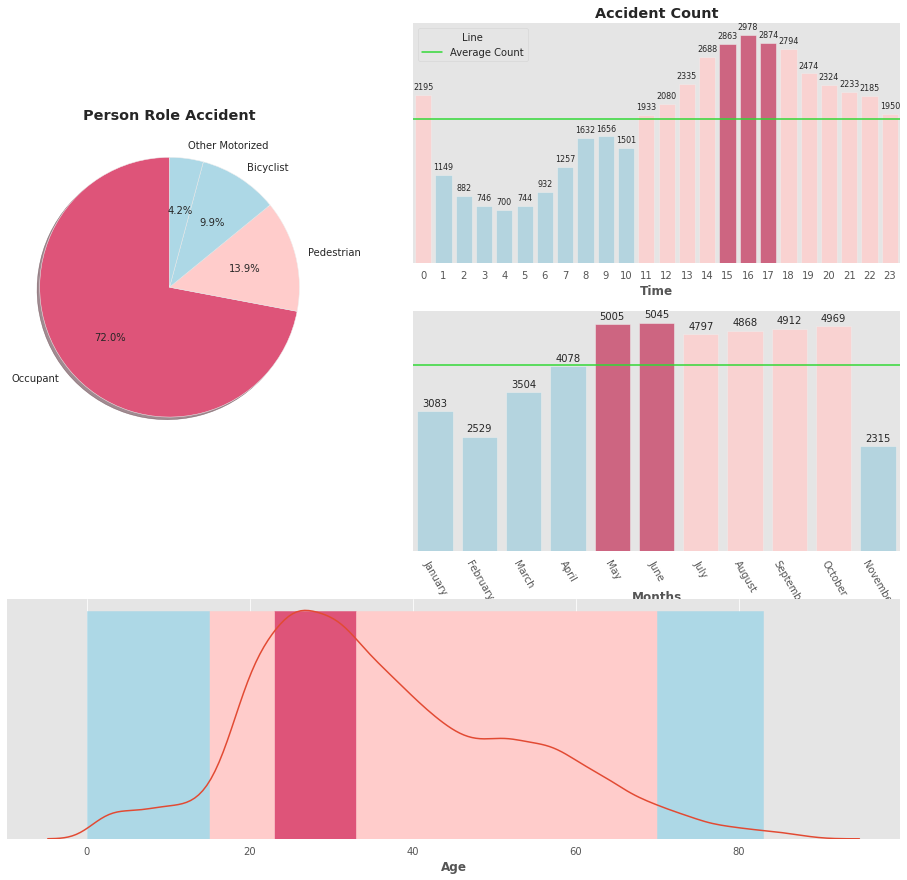

In [ ]:
display(HTML('''
<h1 style="text-align:center; font-size:30px">What quantity of person role, month, time of the day and age of person does accident happen in New York city?</h1>
<h2 style="margin-bottom:4px;text-align:center; font-size:20px">Color Segment</h2>
<div style="width:100%; height: 50px; display: flex">
    <div style="background-color: #DE5479; width:33.33%; height:100%;font-weight: bold; display:flex; justify-content: center;align-items:center;">High</div>
    <div style="background-color: #ffcccb; width:33.33%;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Moderate</div>
    <div style="background-color: lightblue; width:33.33%;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Low</div>
</div>
'''))

fig = plt.figure(figsize=(16,15))

gs = GridSpec(3, 2, figure=fig,width_ratios=[0.4,0.6])
ax0 = fig.add_subplot(gs[:2, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[1, 1])
ax3 = fig.add_subplot(gs[2,:])

labels = PersonRoleCount['index']
sizes = PersonRoleCount.PED_ROLE_per
explode = (0.01, 0.01, 0.01, 0.01,0.01)  

ax0.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,colors=['#DE5479','#ffcccb','lightblue','lightblue','lightblue'])

plot=sns.countplot(data=df,x='CRASH_TIME',palette=Count.Colors.to_list(),ax=ax1)
ax1.axhline(Count['CRASH_TIME'].mean(),color='#31D834',label='Average Count')
# plt.yticks([])
ax1.legend(title='Line')
sns.despine(top=True,right=True,left=True)
for bar in plot.patches:
                plot.annotate(format(int(bar.get_height())),
                                   (bar.get_x() + bar.get_width() / 2,
                                    bar.get_height()), ha='center', va='center',
                                   size=8, xytext=(0, 8),
                                   textcoords='offset points')

        
ax1.axes.get_yaxis().set_visible(False)

Month_Color=['lightblue','lightblue','lightblue','lightblue','#DE5479','#DE5479','#ffcccb','#ffcccb','#ffcccb','#ffcccb','lightblue']
Months=['January','February','March','April','May','June','July','August','September','October','November']

plot=sns.countplot(data=df,x='CRASH_MONTH',order=Months,palette=Month_Color,ax=ax2)
for bar in plot.patches:
                plot.annotate(format(int(bar.get_height())),
                                   (bar.get_x() + bar.get_width() / 2,
                                    bar.get_height()), ha='center', va='center',
                                   size=10, xytext=(0, 8),
                                   textcoords='offset points')
ax2.axhline(MonthCount.CRASH_MONTH.mean(),color='#31D834',label='Average Count')

sns.kdeplot(data=df,x='PERSON_AGE',ax=ax3)
ax3.axvspan(23,33,ymax=0.95,color='#DE5479')
ax3.axvspan(33,70,ymax=0.95,color='#ffcccb')
ax3.axvspan(15,23,ymax=0.95,color='#ffcccb')
ax3.axvspan(0,15,ymax=0.95,color='lightblue')
ax3.axvspan(70,83,ymax=0.95,color='lightblue')


ax2.axes.get_yaxis().set_visible(False)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=-60)
# ax3.set_xticklabels(ax3.get_xticklabels(),rotation=90)
ax3.axes.get_yaxis().set_visible(False)
ax0.set_title('Person Role Accident',weight='bold')
ax1.set_title('Accident Count',weight='bold')
ax1.set_xlabel('Time',weight='bold')
ax2.set_xlabel('Months',weight='bold',labelpad=-20)
ax3.set_xlabel('Age',weight='bold')

plt.show()

display(HTML('''<p style="text-align:justify;">According to the above plot and color segment, the heighest accident is 
noted for people beaing <b>Occupant</b>, the accident <b>between 15 to 17</b> is time of high acident, the <b>May</b> and <b>June</b> has high 
count of accident and the age group <b>23 to 33</b> have highte accident.In New York city, The lowset and Highest age have 
minimun mumber of accident. In addition,as time goes the number of accident increase in the city.</p>
'''))

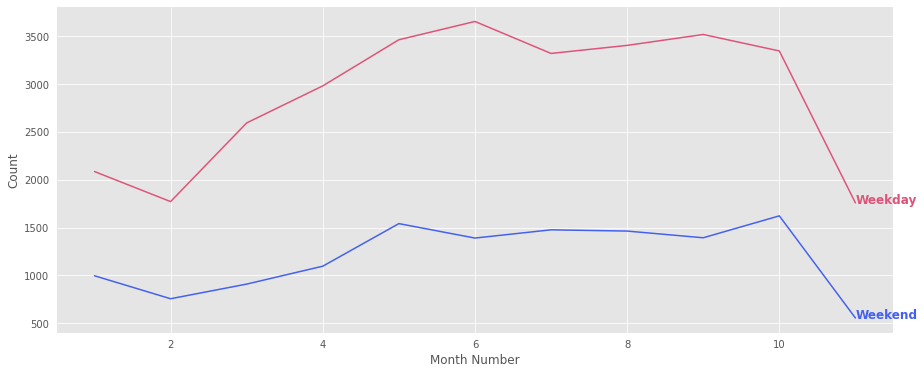

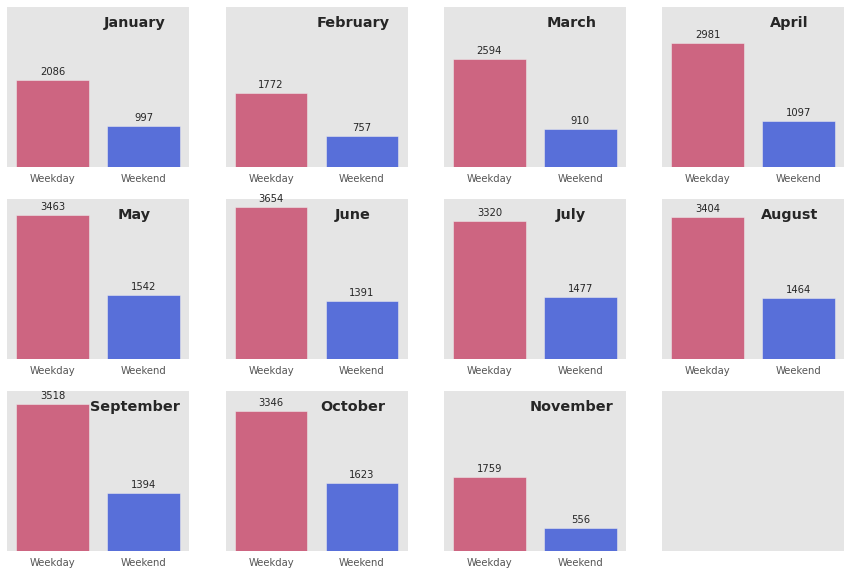

In [ ]:
display(HTML('''
<h1 style="text-align:center; font-size:30px">According to month what amount of accident cases are noted during Weekdays and Weekend in New York city happen?</h1>
<h2 style="margin-bottom:4px;text-align:center; font-size:20px">Color Segment</h2>
<div style="width:100%; height: 50px; display: flex">
    <div style="background-color: #DE5479; width:50%; color: white; height:100%;font-weight: bold; display:flex; justify-content: center;align-items:center;">Weekday</div>
    <div style="background-color: #4361ee; width:50%;color: white;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Weekend</div>
    
</div>
'''))

Data=pd.DataFrame()
Data['cOunt']=df.groupby(['CRASH_MONTH_NUM','Week_D_E'])['Week_D_E'].count()
Data['cOunt_Scaled']=scaler.fit_transform(Data[['cOunt']])
Data=Data.reset_index()
plt.figure(figsize=(15,6))
sns.lineplot(data=Data,x='CRASH_MONTH_NUM',y='cOunt',ci=False,hue='Week_D_E',palette=['#DE5479','#4361ee'])
plt.gca().get_legend().remove()
plt.text(x=11,y=1750,s='Weekday',size=12,weight='bold',color='#DE5479')
plt.text(x=11,y=550,s='Weekend',size=12,weight='bold',color='#4361ee')
plt.ylabel('Count')
plt.xlabel('Month Number')
sns.despine(top=True,right=True)
plt.show()

fig , axs =plt.subplots(3,4,figsize=(15,10),sharey=True)
for axi,axss in enumerate(axs.flatten()):
    if axi<11:
        Data=df[df.CRASH_MONTH==Months[axi]]
        plot=sns.countplot(data=Data ,x='Week_D_E',ax=axss,order=['Weekday','Weekend'],palette=['#DE5479','#4361ee'])
        for bar in plot.patches:
                plot.annotate(format(int(bar.get_height())),
                                   (bar.get_x() + bar.get_width() / 2,
                                    bar.get_height()), ha='center', va='center',
                                   size=10, xytext=(0, 8),
                                   textcoords='offset points')
        axss.set_title(Months[axi],y=1.0,x=0.7,pad=-20,weight='bold')
        axss.set_xlabel('')
        sns.despine(top=True,right=True,left=True)
        
        
        axss.axes.get_yaxis().set_visible(False)
    else:
        axss.axes.get_yaxis().set_visible(False)
        axss.axes.get_xaxis().set_visible(False)
        axss.spines['bottom'].set_visible(False)
#         axss.spines['top'].set_visible(False)
#         axss.spines['left'].set_visible(False)
#         axss.spines['right'].set_visible(False)
        
    
plt.show()
display(HTML('''<p style="text-align:justify;">Obivious the count comparison of weekend and weekday will vary due to 
number of days. However, looking for the <b>higest</b> number of accident in the city, the <b>weekday</b> has <b>high</b> count in <b>June</b> 
with <b>3654</b> and the <b>weekend</b> has <b>high</b> count in <b>October</b> with 1623. The month <b>November</b> has the lowest</b> acciend for both 
<b>weekdays</b> and <b>weekend</b> with <b>1759</b> and <b>556</b> respictively. Moreover, The accident number in <b>weekdays</b> satys <b>more them 3000</b> and in <b>weekend</b> stays 
<b>more then 1390</b> for the <b>6 mounths</b> which are <b>May, June, July, August, September and October</b>.</p>
'''))

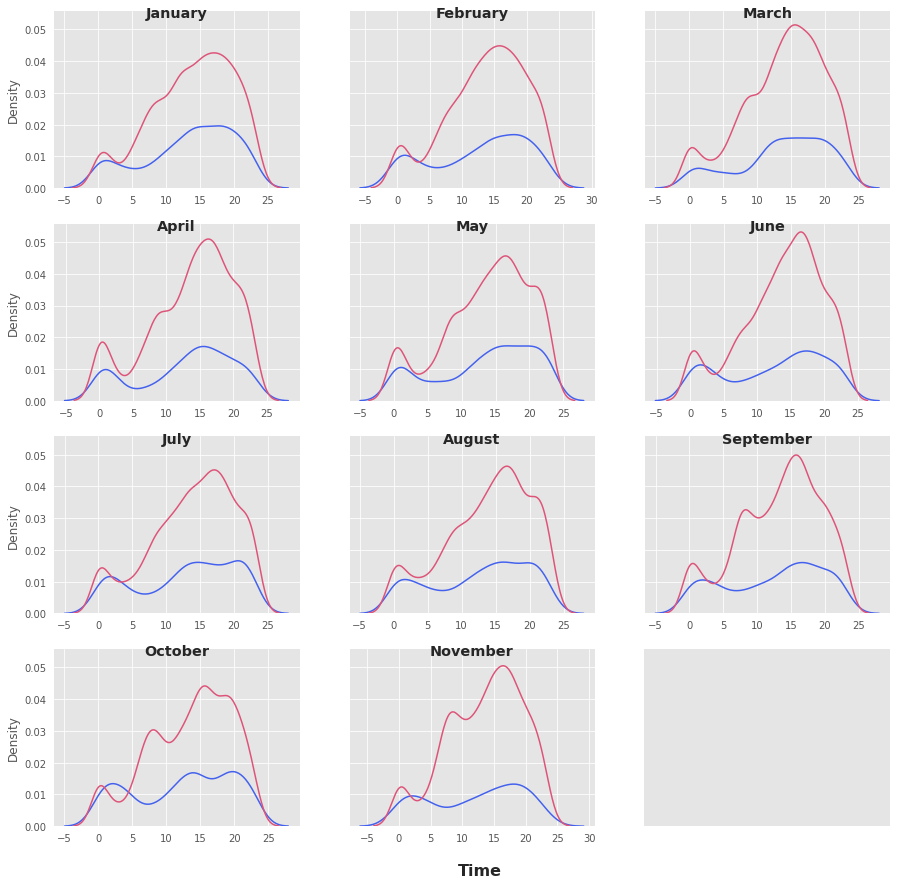

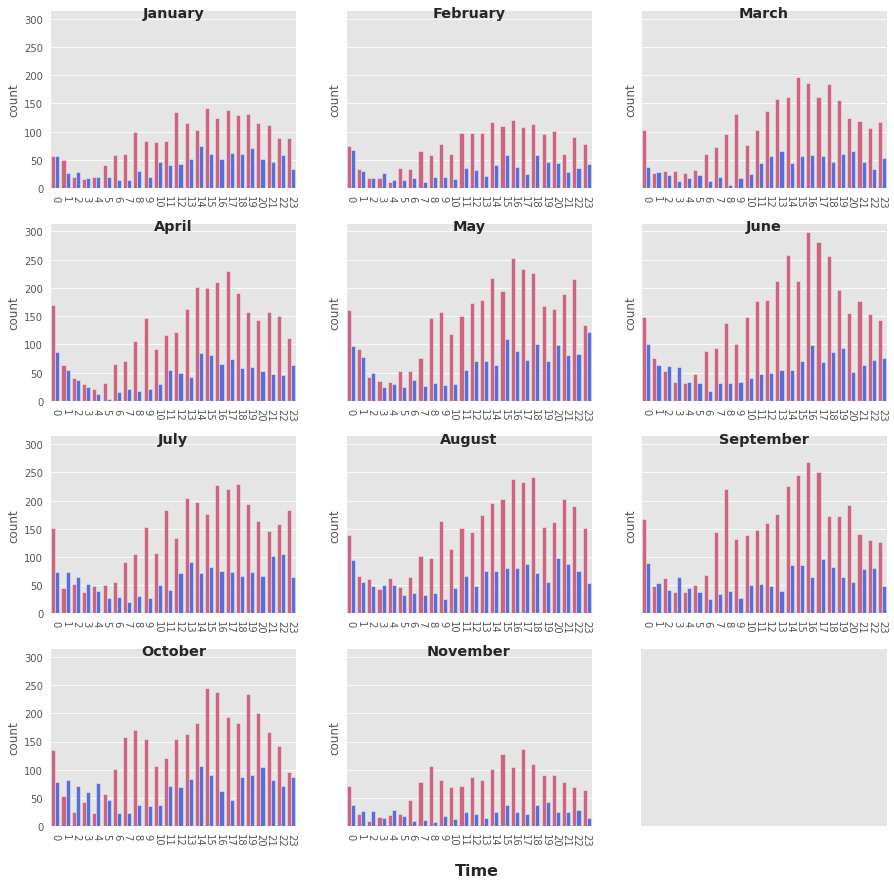

In [ ]:
display(HTML('''
<h1 style="text-align:center; font-size:30px">According to month and time what amount of accident cases are noted during Weekdays and Weekend in New York city happen?</h1>
<h2 style="margin-bottom:4px;text-align:center; font-size:20px">Color Segment</h2>
<div style="width:100%; height: 50px; display: flex">
    <div style="background-color: #DE5479; width:50%; color: white; height:100%;font-weight: bold; display:flex; justify-content: center;align-items:center;">Weekday</div>
    <div style="background-color: #4361ee; width:50%;color: white;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Weekend</div>
    
</div>
'''))

fig, axss=plt.subplots(4,3,figsize=(15,15),sharey=True)
axss = axss.flatten()
for e, i in enumerate(axss):
    if e<11:
        sns.kdeplot(data=df[(df.CRASH_MONTH==Months[e]) ],x='CRASH_TIME',hue='Week_D_E',ax=i,hue_order=['Weekday','Weekend'],palette=['#DE5479','#4361ee'])
        i.set_title(Months[e],weight='bold',y=0.93)
        i.get_legend().remove()
        i.set_xlabel('')
        sns.despine(right=True,top=True)
    else:
        i.axes.get_yaxis().set_visible(False)
        i.axes.get_xaxis().set_visible(False)
        i.spines['bottom'].set_visible(False)
        i.spines['left'].set_visible(False)

fig.text(x=0.5,y=0.08,s='Time', weight='bold',size=16)
plt.show()

display(HTML('''<p style="text-align:justify;">According to the KDE plot,during <b>weekdays</b> from <b>5 A.M. </b> 
the accident start to increase in the <b>New city</b>.At 15 (3 P.M.) the accident in the city reaches at the peak and 
decreases till midnight. In the month of June the frequency of the accident is highst of all at 15 (3 P.M.). With 
refrence to the whold day, in the morning at 4 A.M., the accident in <b>weekdays and weekend</b> has <b>same frequency</b> through out the year except <b>October</b> and <b>November</b> which 
describes that the <b>weekend has more accident at 4 A.M compare to weekdays</b>. The Most eye catching feature of the plot
is that the trend of accident stays same for <b>all months through out the day</b>, during the <b>start of the day</b> the accident is
<b>high</b> then is <b>reduces</b> till <b>4 A.M.</b> in the moning then again it <b>starts to increas from 5 A.M.</b> reaches the <b>peak at 3 P.M. </b>and <b>reduce as the day set to end</b>.
In the weekend, the saturation level of the accident remains same for the moning and afternoon.Moreover in the weekend,
The <b>density</b> of the acciden <b>stays high</b> for <b>long period</b> form <b>10 A.M. till 23 P.M.</b>.</p>
'''))
display(HTML('''
<h1 style="text-align:center; font-size:30px">precise count of accident which supports above discussion</h1>
<h2 style="margin-bottom:4px;text-align:center; font-size:20px">Color Segment</h2>
<div style="width:100%; height: 50px; display: flex">
    <div style="background-color: #DE5479; width:50%; color: white; height:100%;font-weight: bold; display:flex; justify-content: center;align-items:center;">Weekday</div>
    <div style="background-color: #4361ee; width:50%;color: white;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Weekend</div>
    
</div>
'''))

fig, axss=plt.subplots(4,3,figsize=(15,15),sharey=True)
axss = axss.flatten()
for e, i in enumerate(axss):
    if e<11:
        sns.countplot(data=df[(df.CRASH_MONTH==Months[e]) ],x='CRASH_TIME',hue='Week_D_E',ax=i,hue_order=['Weekday','Weekend'],palette=['#DE5479','#4361ee'])
        i.set_title(Months[e],weight='bold',y=0.93)
        i.get_legend().remove()
        i.set_xlabel('')
        i.set_xticklabels(i.get_xticklabels(), rotation=-90)
        sns.despine(right=True,top=True)
    else:
        i.axes.get_yaxis().set_visible(False)
        i.axes.get_xaxis().set_visible(False)
        i.spines['bottom'].set_visible(False)
        i.spines['left'].set_visible(False)
fig.text(x=0.5,y=0.08,s='Time', weight='bold',size=16)        
plt.show()

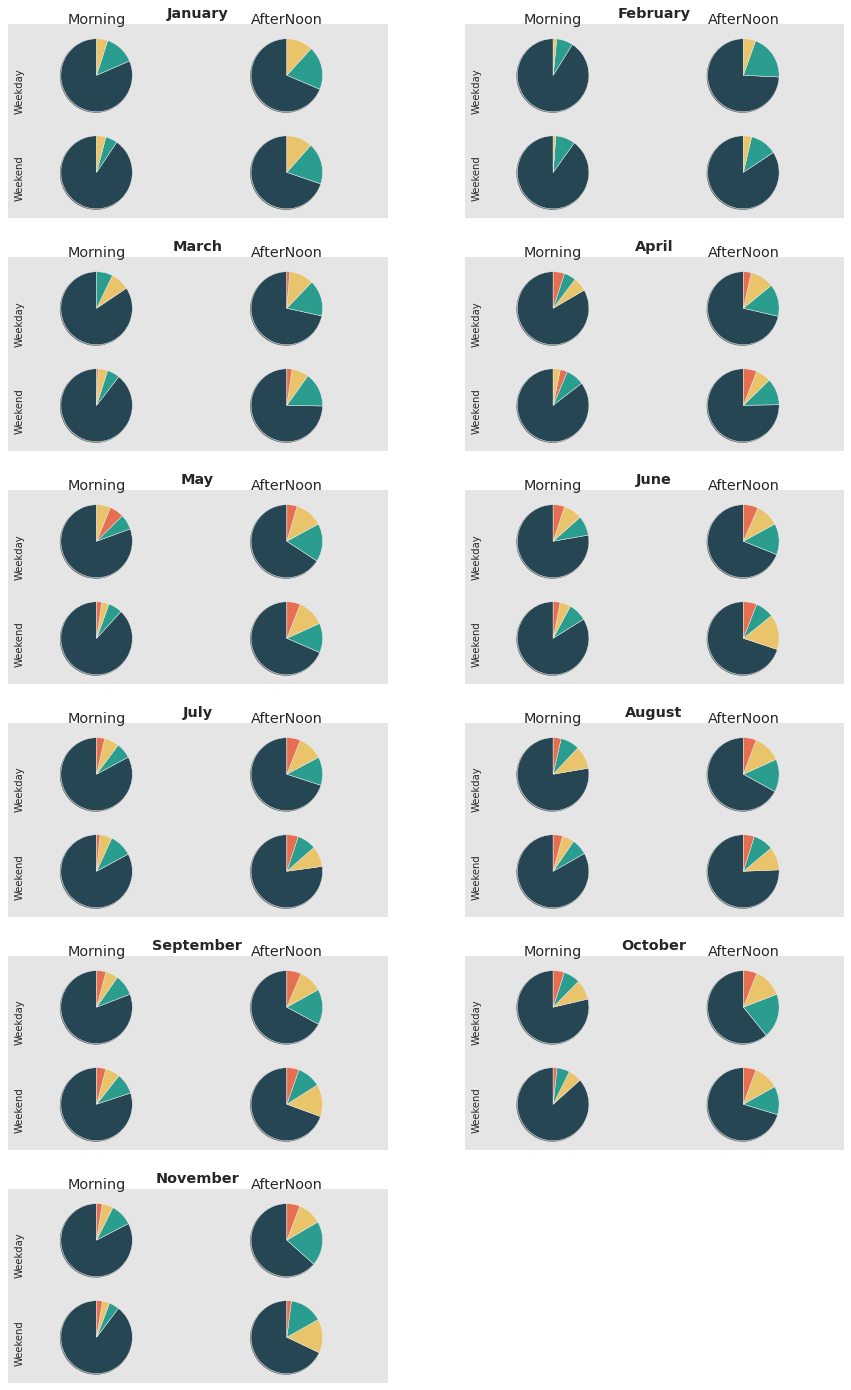

In [ ]:
display(HTML(f'''<h1 style="text-align: center">Which emotional status is related to safety equiptment?</h1>
<div style="width:100%; height: 50px; display: flex">
    <div style="background-color: #264653;color: white; width:25%; height:100%;font-weight: bold; display:flex; justify-content: center;align-items:center;">Occupant</div>
    <div style="background-color: #2a9d8f;color: white; width:25%;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Pedestrian</div>
    <div style="background-color: #e9c46a;color: white; width:25%;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Bicyclist</div>
    <div style="background-color: #e76f51;color: white; width:25%;height:100%;display:flex; justify-content: center;align-items:center;font-weight: bold;">Other Moterize</div>
</div>
'''))


fig=plt.figure(figsize=(15,25))
gs = GridSpec(6, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[4, 0])
ax10 = fig.add_subplot(gs[4, 1])
ax11 = fig.add_subplot(gs[5, 0])
Axss=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11]
for e,i in enumerate(Axss):
    i.set_title(Months[e],weight='bold')
    i.axes.get_yaxis().set_visible(False)
    i.axes.get_xaxis().set_visible(False)
    i.spines['top'].set_visible(False)
    i.annotate('Weekday',(0.02,0.55),rotation='vertical')
    i.annotate('Weekend',(0.02,0.1),rotation='vertical')

    for s in ['Weekday','Weekend']:
        Morning=df[(df.CRASH_TIME>=0) & (df.CRASH_TIME<=5)&(df.Week_D_E==s)&(df.CRASH_MONTH==Months[e])]
        Morning=Morning.PERSON_TYPE.value_counts().reset_index()
        Morning['Person_Color']=Morning['index'].apply(lambda x: '#264653' if x=='Occupant' else('#2a9d8f' if x=='Pedestrian' else ('#e9c46a' if x=='Bicyclist' else '#e76f51')))
#         Morning['PERSON_TYPE']=Morning.PERSON_TYPE.apply(lambda x: round(x/Morning.PERSON_TYPE.sum(),2))
        Morninglabels = Morning['index']
        Morningsizes = Morning.PERSON_TYPE
        
        AfterNoon=df[(df.CRASH_TIME>=12) & (df.CRASH_TIME<=17)&(df.Week_D_E==s)&(df.CRASH_MONTH==Months[e])]
        AfterNoon=AfterNoon.PERSON_TYPE.value_counts().reset_index()
        AfterNoon['Person_Color']=AfterNoon['index'].apply(lambda x: '#264653' if x=='Occupant' else('#2a9d8f' if x=='Pedestrian' else ('#e9c46a' if x=='Bicyclist' else '#e76f51')))
#         AfterNoon['PERSON_TYPE']=AfterNoon.PERSON_TYPE.apply(lambda x: round(x/AfterNoon.PERSON_TYPE.sum(),2))
        AfterNoonlabels = AfterNoon['index']
        AfterNoonsizes = AfterNoon.PERSON_TYPE
#         explode = (0.01, 0.01, 0.01, 0.01,0.01)  # only "explode" the 2nd slice (i.e. 'Hogs')
        if s=='Weekday':
            Weekday1 = i.inset_axes([0.5, 0.5, 0.47, 0.47])
            Weekday2 = i.inset_axes([0, 0.5, 0.47, 0.47])
            Weekday2.pie(Morningsizes,  
                        shadow=True, startangle=90,colors=Morning.Person_Color.to_list())
            Weekday2.set_title('Morning')
            Weekday1.pie(AfterNoonsizes,  
                        shadow=True, startangle=90,colors=AfterNoon.Person_Color.to_list())
            Weekday1.set_title('AfterNoon')
        else:
            Weekend1 = i.inset_axes([0.5, 0, 0.47, 0.47])
            Weekend2 = i.inset_axes([0, 0, 0.47, 0.47])
#             Weekend2.set_title('Morning')
#             Weekend1.set_title('AfterNoon')
            
            Weekend2.pie(Morningsizes,  
                    shadow=True, startangle=90,colors=Morning.Person_Color.to_list())
            Weekend1.pie(AfterNoonsizes,  
                    shadow=True, startangle=90,colors=AfterNoon.Person_Color.to_list())
plt.show()
display(HTML('''<p style="text-align:justify;">The above plot gives percent distribution of the accident for role of the rode user 
in the New York city.The role includes Occupant, Pedestrian, Bicyclist and other Moterize. The general view of the plot
adumbrates that the person being <b>Occupant</b> experiance <b>high</b> percent of the accident <b>comapre to others</b>.The other fact of the plot is that the
cases of accidet for <b>Occupant reduces</b> as the <b>time passes</b> and the cases of <b>pedestrian,Bicyclist and Other Moterize increases</b>.
The <b>Janurary</b> and <b>February</b> has <b>zero</b> case of accident for <b>Other Moterize</b>. Through out the year, the accident of <b>Other Moterize remains low</b> where as in month
<b>June, July, August and September</b> the cases of <b>Bicyclist</b> increases in <b>weekend</b> during <b>afternoon</b> time. </p>
'''))